In [2]:
from tensorboard.backend.event_processing import event_accumulator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme(style="darkgrid")

In [20]:
dddqn_path = [
    'train_log_final/madddqn_t0_e0/Jan19_19-25-49_Idiot/events.out.tfevents.1611055550.Idiot.25470.0',
    'train_log_final/madddqn_t0_e0/Jan19_19-53-52_Idiot/events.out.tfevents.1611057233.Idiot.27751.0',
    'train_log_final/madddqn_t0_e0/Jan19_19-54-05_Idiot/events.out.tfevents.1611057245.Idiot.27812.0'
]
dddqn_per_path = [
    'train_log_final/madddqn_t0_e0/Jan20_01-19-46_Idiot/events.out.tfevents.1611076787.Idiot.2056.0',
    'train_log_final/madddqn_t0_e0/Jan20_01-20-02_Idiot/events.out.tfevents.1611076803.Idiot.2191.0',
    'train_log_final/madddqn_t0_e0/Jan20_01-20-07_Idiot/events.out.tfevents.1611076809.Idiot.2236.0'
]
maddpg = [
    'train_log_final/maddpg_t0_e0/Jan20_19-48-42_ubuntu-imre_s0/events.out.tfevents.1611143324.ubuntu-imre.22740.0',
    'train_log_final/maddpg_t0_e0/Jan20_19-48-50_ubuntu-imre_s10/events.out.tfevents.1611143332.ubuntu-imre.23018.0',
    'train_log_final/maddpg_t0_e0/Jan20_19-48-58_ubuntu-imre_s20/events.out.tfevents.1611143340.ubuntu-imre.23324.0'
]
maddpg_ps = [
    'train_log_final/maddpg_ps_t0_e0/Jan20_13-12-36_Idiot_s0/events.out.tfevents.1611119556.Idiot.24797.0',
    'train_log_final/maddpg_ps_t0_e0/Jan20_13-12-44_Idiot_s10/events.out.tfevents.1611119564.Idiot.24841.0',
    'train_log_final/maddpg_ps_t0_e0/Jan20_13-12-50_Idiot_s20/events.out.tfevents.1611119571.Idiot.24884.0'
]

In [31]:
def get_item(paths, key, downsample=1):
    rew = [[] for _ in range(len(paths))]
    for i in range(len(paths)):
        ea = event_accumulator.EventAccumulator(paths[i])
        ea.Reload()
        num = len(ea.scalars.Items(key))
        for j in range(num // downsample + 1):
            if j * downsample >= num:
                break
            rew[i].append(ea.scalars.Items(key)[j * downsample].value)
    return np.array(rew)

### training_env: smoothed_completion & smoothed_score

In [15]:
downsample = 20
dddqn_sc = get_item(dddqn_path, 'training/smoothed_completion', downsample).reshape([-1])
dddqn_ss = get_item(dddqn_path, 'training/smoothed_score', downsample).reshape([-1])
dddqn_per_sc = get_item(dddqn_per_path, 'training/smoothed_completion', downsample).reshape([-1])
dddqn_per_ss = get_item(dddqn_per_path, 'training/smoothed_score', downsample).reshape([-1])
maddpg_sc = get_item(maddpg, 'training/smoothed_completion', downsample).reshape([-1])
maddpg_ss = get_item(maddpg, 'training/smoothed_score', downsample).reshape([-1])
maddpg_ps_sc = get_item(maddpg_ps, 'training/smoothed_completion', downsample).reshape([-1])
maddpg_ps_ss = get_item(maddpg_ps, 'training/smoothed_score', downsample).reshape([-1])

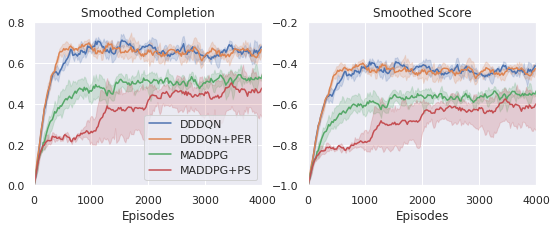

In [29]:
plt.figure(figsize=[9, 3])
plt.subplot(1, 2, 1)
idx = np.arange(0, len(dddqn_sc) // 3) * downsample
x = np.concatenate([idx for _ in range(12)])
y = np.concatenate([dddqn_sc, dddqn_per_sc, maddpg_sc, maddpg_ps_sc])
h = np.repeat([0, 1, 2, 4], dddqn_sc.shape[0])
ax = sns.lineplot(x=x, y=y, hue=h, palette=sns.color_palette()[:4])
ax.set_xlim([0, idx[-1]])
ax.set_ylim([0, 0.8])
ax.set_xlabel('Episodes')
ax.set_title('Smoothed Completion')
plt.legend(['DDDQN', 'DDDQN+PER', 'MADDPG', 'MADDPG+PS'], loc=4)
plt.subplot(1, 2, 2)
y = np.concatenate([dddqn_ss, dddqn_per_ss, maddpg_ss, maddpg_ps_ss])
ax = sns.lineplot(x=x, y=y, hue=h, palette=sns.color_palette()[:4])
ax.set_xlim([0, idx[-1]])
ax.set_ylim([-1., -0.2])
ax.set_xlabel('Episodes')
ax.set_title('Smoothed Score')
ax.legend_.remove()
plt.savefig('training.png', dpi=300, bbox_inches='tight')
plt.savefig('training.pdf', bbox_inches='tight')

### Evaluation_env: completion & score

In [32]:
downsample = 1
dddqn_e_sc = get_item(dddqn_path, 'evaluation/completions_mean', downsample).reshape([-1])
dddqn_e_ss = get_item(dddqn_path, 'evaluation/scores_mean', downsample).reshape([-1])
dddqn_e_per_sc = get_item(dddqn_per_path, 'evaluation/completions_mean', downsample).reshape([-1])
dddqn_e_per_ss = get_item(dddqn_per_path, 'evaluation/scores_mean', downsample).reshape([-1])
maddpg_e_sc = get_item(maddpg, 'evaluation/completions_mean', downsample).reshape([-1])
maddpg_e_ss = get_item(maddpg, 'evaluation/scores_mean', downsample).reshape([-1])
maddpg_e_ps_sc = get_item(maddpg_ps, 'evaluation/completions_mean', downsample).reshape([-1])
maddpg_e_ps_ss = get_item(maddpg_ps, 'evaluation/scores_mean', downsample).reshape([-1])

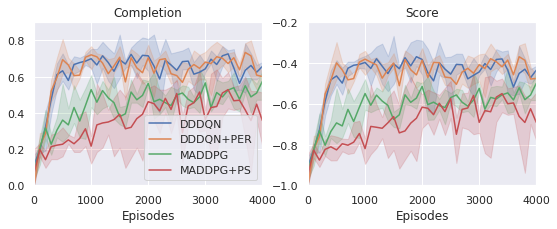

In [37]:
plt.figure(figsize=[9, 3])
plt.subplot(1, 2, 1)
idx = np.arange(0, len(dddqn_e_sc) // 3) * downsample * 100
x = np.concatenate([idx for _ in range(12)])
y = np.concatenate([dddqn_e_sc, dddqn_e_per_sc, maddpg_e_sc, maddpg_e_ps_sc])
h = np.repeat([0, 1, 2, 4], dddqn_e_sc.shape[0])
ax = sns.lineplot(x=x, y=y, hue=h, palette=sns.color_palette()[:4])
ax.set_xlim([0, idx[-1]])
ax.set_ylim([0, 0.9])
ax.set_xlabel('Episodes')
ax.set_title('Completion')
plt.legend(['DDDQN', 'DDDQN+PER', 'MADDPG', 'MADDPG+PS'], loc=4)
plt.subplot(1, 2, 2)
y = np.concatenate([dddqn_e_ss, dddqn_e_per_ss, maddpg_e_ss, maddpg_e_ps_ss])
ax = sns.lineplot(x=x, y=y, hue=h, palette=sns.color_palette()[:4])
ax.set_xlim([0, idx[-1]])
ax.set_ylim([-1., -0.2])
ax.set_xlabel('Episodes')
ax.set_title('Score')
ax.legend_.remove()
plt.savefig('evaluation.png', dpi=300, bbox_inches='tight')
plt.savefig('evaluation.pdf', bbox_inches='tight')